# FORECASTING FOR TIME SERIES
* Load the data and get avg_number_of_vehicles
* Explore the time series and check stationarity
* Train test split
* Apply seasonal arima to get forecasted traffic data
* Plot the forecast with confidence intervals
* Calculate metrics for forecasted and actual values

In [2]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_data.csv', parse_dates=['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   max_number_of_vehicles    10323 non-null  int64         
 1   minimum_speed             10323 non-null  int64         
 2   min_number_of_vehicles    10323 non-null  int64         
 3   average_speed             10323 non-null  float64       
 4   avg_number_of_vehicles    10323 non-null  float64       
 5   maximum_speed             10323 non-null  int64         
 6   date                      10323 non-null  datetime64[ns]
 7   average_felt_temperature  10323 non-null  float64       
 8   average_road_temperature  10323 non-null  float64       
 9   minimum_felt_temperature  10323 non-null  float64       
 10  minimum_precipitation     10323 non-null  float64       
 11  maximum_humidity          10323 non-null  float64       
 12  maximum_felt_tempe

In [5]:
df.head()

,max_number_of_vehicles,minimum_speed,min_number_of_vehicles,average_speed,avg_number_of_vehicles,maximum_speed,date,average_felt_temperature,average_road_temperature,minimum_felt_temperature,...,minimum_temperature,average_temperature,maximum_road_temperature,minimum_humidity,minimum_directionofwind,minimum_wind,maximum_directionofwind,minimum_road_temperature,maximum_wind,average_precipitation
0,298,6,11,56.59,58.72,193,2020-01-01 00:00:00,4.00,3.79,-4.22,...,-0.55,4.40,8.0,59.52,0.0,0.0,355.0,-13.2,6.41,1.18
1,272,6,11,57.41,53.68,188,2020-01-01 01:00:00,3.95,3.34,-3.75,...,-0.41,4.36,7.4,57.21,1.0,0.0,354.0,-37.1,6.00,0.23
2,223,3,11,59.70,44.72,197,2020-01-01 02:00:00,4.11,4.08,-1.24,...,1.15,4.38,7.2,52.10,0.0,0.0,355.0,1.8,5.39,0.93
3,166,6,11,61.05,37.51,191,2020-01-01 03:00:00,4.26,4.23,0.39,...,2.12,4.36,6.6,54.88,0.0,0.0,355.0,2.7,5.01,0.62
4,113,6,11,62.44,32.87,207,2020-01-01 04:00:00,4.92,4.56,0.58,...,2.34,4.65,6.7,56.46,0.0,0.0,355.0,2.9,3.97,0.02


# ARIMA MODEL FOR AVG TEMPERATURE

* p --> Order of AR (autoregressive term) -number of lags to be used as predictors for regression
* q --> Order of MA (moving average term) 
* d --> Order of Differencing (to make the series stationary)

## Extract num_vehicles data and resample it daily

In [6]:
veh = df[['date', 'avg_number_of_vehicles']]
veh = veh.set_index('date')['2021-01-01':'2021-04-28']

In [7]:
veh = veh.resample(rule='D',).mean().dropna()

## Find and update missing date values

In [8]:
full_range = set(pd.date_range('2021-01-01', '2021-04-28', freq='D'))
veh_dates = set(veh.index.tolist())
missing_days = full_range.difference(veh_dates)
missing_days = pd.Series(list(missing_days)).sort_values().reset_index(drop=True)
missing_days.values

array(['2021-02-22T00:00:00.000000000', '2021-02-23T00:00:00.000000000',
       '2021-02-24T00:00:00.000000000', '2021-02-25T00:00:00.000000000',
       '2021-02-26T00:00:00.000000000', '2021-02-27T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-03-02T00:00:00.000000000', '2021-03-03T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-03-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [9]:
veh=veh.interpolate()

<AxesSubplot:xlabel='date'>

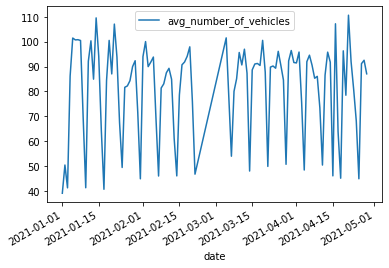

In [10]:
veh.plot()

## Train - Test Split

In [11]:
veh.iloc[int(len(veh)*0.80)]

avg_number_of_vehicles    90.53125
Name: 2021-04-07 00:00:00, dtype: float64

In [12]:
X = veh.loc['2021-01-01':'2021-04-07']
y = veh.loc['2021-04-07':]

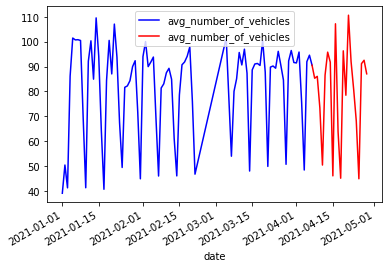

In [13]:
ax = X.plot(c='b')
y.plot(c='r', ax=ax)
plt.title
plt.show()

## Check if Time Series is stationary

In [14]:
#Test if stationary (Dicky Fuller test) - h0: Time series data is not stationary
from statsmodels.tsa.stattools import adfuller
def is_stationary(ts):
    results = adfuller(ts)
    print(f"Test Statistic: {results[0]}\nP-Value: {results[1]}\nCritical Test stats for intervals: {results[4]}\n")
    if results[1]<0.05:
        print('Time series data is stationary'),
    else:
        print('Time series data is not stationary')

In [15]:
is_stationary(X)

Test Statistic: -3.051344956304205
P-Value: 0.030369755154754676
Critical Test stats for intervals: {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}

Time series data is stationary


* No differencing required

# Seasonal differencing

In [44]:
is_stationary(X.diff(7).dropna())

Test Statistic: -4.69172517146048
P-Value: 8.721695907072678e-05
Critical Test stats for intervals: {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}

Time series data is stationary


* Seasonality is weekly
* No seasonal differencing required for 7 days (weekly seasonality)

In [45]:
from pmdarima.arima.utils import ndiffs
ndiffs(X, test='adf')

0

## Plot ACF and PACF

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


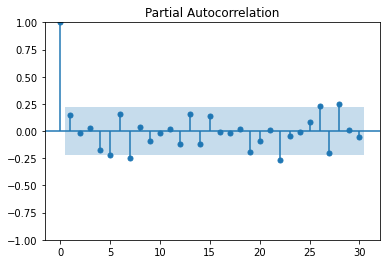

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(X.diff(7).dropna(), lags=30);

In [50]:
ser = X.diff(7).dropna().iloc[:,0]
ar0 = ser.corr(ser)
ar1 = ser.corr(ser.shift().dropna())
ar2 = ser.corr(ser.shift().shift().dropna())
ar0, ar1, ar2

(0.9999999999999999, 0.17387110194814964, 0.002924056156647107)

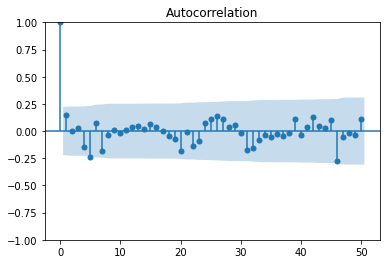

In [51]:
plot_acf(ser.reset_index(drop=True), lags=50);

* Autoregression term(p): 0
* Moving Average term(q): 0
- **SEASONAL**
* Autoregression term(p): 1
* Moving Average term(q): 1

## Run ARIMA Model

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model = SARIMAX(X, order=(0,0,0), seasonal_order=(0,1,0,7))
model = model.fit()
print(model.summary())

                                 SARIMAX Results                                  
Dep. Variable:     avg_number_of_vehicles   No. Observations:                   85
Model:                SARIMAX(0, 1, 0, 7)   Log Likelihood                -308.793
Date:                    Thu, 21 Apr 2022   AIC                            619.587
Time:                            22:10:03   BIC                            621.944
Sample:                                 0   HQIC                           620.530
                                     - 85                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       160.7597     11.202     14.351      0.000     138.804     182.715
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):               257.15
Prob(Q):       

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [53]:
forecast = model.get_forecast(len(y))
fc = forecast.predicted_mean
fc.index = y.index
conf = forecast.conf_int(alpha=0.05)

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


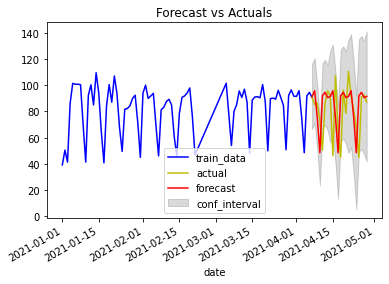

In [54]:
ax = X.plot(c='b')
y.plot(c='y', ax=ax)
fc.plot(c='r', ax=ax)
plt.fill_between(y.index, conf.iloc[:,0], conf.iloc[:,1], 
                 color='k', alpha=.15)
plt.legend(labels=['train_data', 'actual', 'forecast', 'conf_interval'])
plt.title('Forecast vs Actuals')
plt.show()

In [55]:
pd.DataFrame({'forecast':fc.values, 'actual':y.iloc[:,0]})

,forecast,actual
date,,
2021-04-07,91.446957,90.531250
2021-04-08,95.811250,85.313333
2021-04-09,75.540417,86.078750
2021-04-10,48.528261,73.465652
2021-04-11,91.948333,50.516667
2021-04-12,94.555833,86.546667
2021-04-13,90.531250,95.772083
2021-04-14,91.446957,91.758333
2021-04-15,95.811250,46.184000


## DECOMPOSITION

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
results = seasonal_decompose(X,period=30)

<Figure size 500x500 with 0 Axes>

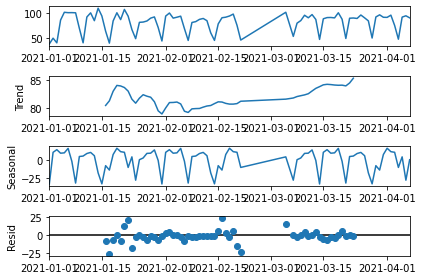

In [58]:
plt.figure(figsize=(100,100), dpi=5)
results.plot();

In [59]:
y.values

array([[ 90.53125   ],
       [ 85.31333333],
       [ 86.07875   ],
       [ 73.46565217],
       [ 50.51666667],
       [ 86.54666667],
       [ 95.77208333],
       [ 91.75833333],
       [ 46.184     ],
       [107.142     ],
       [ 63.895     ],
       [ 45.23916667],
       [ 96.3       ],
       [ 78.5       ],
       [110.58      ],
       [ 91.99041667],
       [ 80.794375  ],
       [ 68.16458333],
       [ 45.01625   ],
       [ 91.15583333],
       [ 92.51916667],
       [ 87.08888889]])

https://app.datacamp.com/learn/courses/time-series-analysis-in-python

In [60]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                  # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, y.iloc[:,0].values)

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_20668/937722734.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_20668/937722734.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.2772169368004324,
 'me': 4.180974665129555,
 'mae': 16.52203510649977,
 'mpe': 0.1298388458277401,
 'rmse': 23.071483942210907,
 'acf1': -0.34221801009313885,
 'corr': 0.14395742499437392,
 'minmax': 0.1849459685959971}

### Auto Selection of ARIMA components 

In [61]:
import pmdarima as pm

In [233]:
automodel = pm.auto_arima(X, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=7,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0,  start_Q=0,
                      max_P=3, max_Q=3,
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=621.215, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=618.856, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=618.170, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=619.587, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=620.839, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=620.114, Time=0.09 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=620.089, Time=0.21 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=618.418, Time=0.07 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=621.852, Time=0.51 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=619.696, Time=0.05 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=620.076, Time=0.11 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=620.061, Time=0.12 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=618.679, Time=0.08 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[7]             : AIC=616.605, 